In [4]:
# Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from pprint import pprint


In [5]:
data_path=('../output_data/fred_data.csv')
work_file=pd.read_csv(data_path)
work_file.head()


,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.0,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.0,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.0,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.0,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.0,NaN,NaN,859.96,34.71,3.84,NaN


In [ ]:
# CSV file is above this cell 
# New code (11/15) is between here and 'New Code Ends'

In [11]:
# Merging home_price_index_and_Mortgage Rates
home_price_index_and_Mortgage_Rates = work_file[[
    'Year','Avg. 30 Year Fixed Mortgage Rate','Avg. 15 Year Fixed Mortgage Rate','Avg. Home Price Index'
]]

# Dropping rows prior to 1990 - for all data to start at the same year
home_price_index_and_Mortgage_Rates=home_price_index_and_Mortgage_Rates.loc[home_price_index_and_Mortgage_Rates['Year']> 1990]

home_price_index_and_Mortgage_Rates

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Home Price Index
28,1991,9.25,8.40,75.93
29,1992,8.39,7.94,76.33
30,1993,7.31,6.82,77.41
31,1994,8.38,7.89,79.47
32,1995,7.93,7.48,80.99
33,1996,7.81,7.32,82.81
34,1997,7.60,7.13,85.32
35,1998,6.94,6.59,90.10
36,1999,7.44,7.06,96.37
37,2000,8.05,7.72,104.78


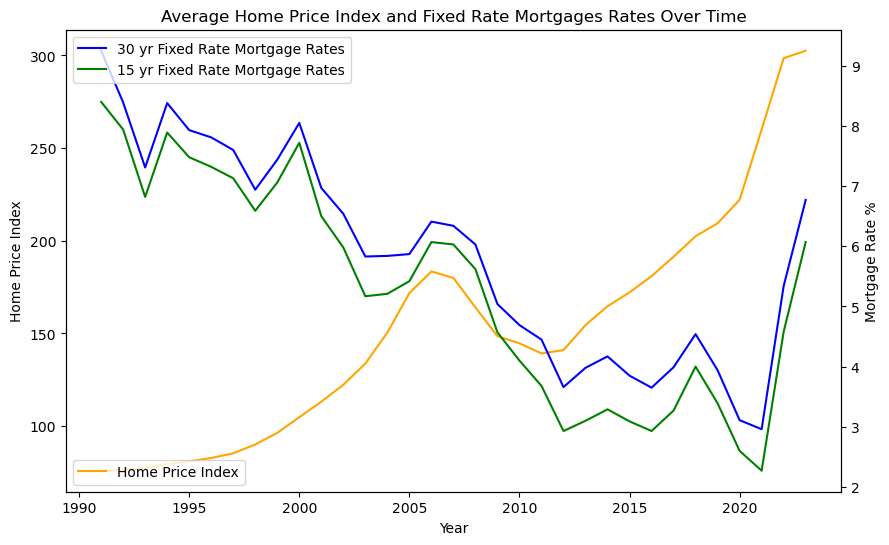

<Figure size 640x480 with 0 Axes>

In [47]:
# Ploting mortgage rates(30yr & 15yr) against housing index 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home price index on the primary y-axis
ax1.plot(home_price_index_and_Mortgage_Rates['Year'], home_price_index_and_Mortgage_Rates['Avg. Home Price Index'], label='Home Price Index', color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Price Index', color='black')
ax1.tick_params('y', colors='black')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_price_index_and_Mortgage_Rates['Year'], home_price_index_and_Mortgage_Rates['Avg. 30 Year Fixed Mortgage Rate'], label='30 yr Fixed Rate Mortgage Rates', color='blue')
ax2.plot(home_price_index_and_Mortgage_Rates['Year'], home_price_index_and_Mortgage_Rates['Avg. 15 Year Fixed Mortgage Rate'], label='15 yr Fixed Rate Mortgage Rates', color='green')  
ax2.set_ylabel('Mortgage Rate %', color='black')
ax2.tick_params('y', colors='black')

ax1.set_title('Average Home Price Index and Fixed Rate Mortgages Rates Over Time')

# Add a legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.show()

plt.savefig('Average Home Price Index and Mortgage Rates Over Time.png')


In [54]:
# Merging home_price_index_and_Mortgage Rates
home_price_sales_and_Mortgage_Rates = work_file[[
    'Year','Avg. 30 Year Fixed Mortgage Rate','Avg. 15 Year Fixed Mortgage Rate','Avg. Median Home Sale Price'
]]

# Dropping rows prior to 1990 - for all data to start at the same year
home_price_sales_and_Mortgage_Rates=home_price_sales_and_Mortgage_Rates.loc[home_price_sales_and_Mortgage_Rates['Year']> 1990]

home_price_sales_and_Mortgage_Rates

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price
28,1991,9.25,8.40,119975.00
29,1992,8.39,7.94,121375.00
30,1993,7.31,6.82,126500.00
31,1994,8.38,7.89,130425.00
32,1995,7.93,7.48,133475.00
33,1996,7.81,7.32,140250.00
34,1997,7.60,7.13,145000.00
35,1998,6.94,6.59,151925.00
36,1999,7.44,7.06,160125.00
37,2000,8.05,7.72,167550.00


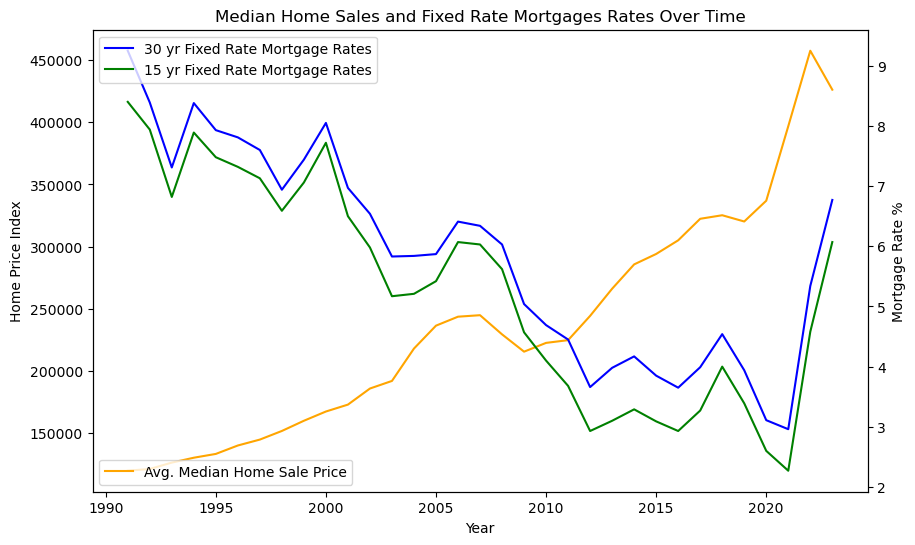

<Figure size 640x480 with 0 Axes>

In [57]:
# Ploting Average Home Sales against Mortgage rates

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Avg Median Home Sales on the primary y-axis
ax1.plot(home_price_sales_and_Mortgage_Rates['Year'], home_price_sales_and_Mortgage_Rates['Avg. Median Home Sale Price'], label='Avg. Median Home Sale Price', color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Price Index', color='black')
ax1.tick_params('y', colors='black')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_price_sales_and_Mortgage_Rates['Year'], home_price_sales_and_Mortgage_Rates['Avg. 30 Year Fixed Mortgage Rate'], label='30 yr Fixed Rate Mortgage Rates', color='blue')
ax2.plot(home_price_sales_and_Mortgage_Rates['Year'], home_price_sales_and_Mortgage_Rates['Avg. 15 Year Fixed Mortgage Rate'], label='15 yr Fixed Rate Mortgage Rates', color='green')  
ax2.set_ylabel('Mortgage Rate %', color='black')
ax2.tick_params('y', colors='black')

ax1.set_title('Median Home Sales and Fixed Rate Mortgages Rates Over Time')

# Add a legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.show()

plt.savefig('Median Home Sales and Mortgage Rates Over Time.png')

# New Code Ends #

In [28]:
# Merging home_price_index_df with mortgage_30_df
home_price_index_and_30yr = work_file[[
    'Year','Avg. 30 Year Fixed Mortgage Rate','Avg. Home Price Index'
]]
home_price_index_and_30yr

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. Home Price Index
0,1963,NaN,NaN
1,1964,NaN,NaN
2,1965,NaN,NaN
3,1966,NaN,NaN
4,1967,NaN,NaN
5,1968,NaN,NaN
6,1969,NaN,NaN
7,1970,NaN,NaN
8,1971,7.54,NaN
9,1972,7.38,NaN


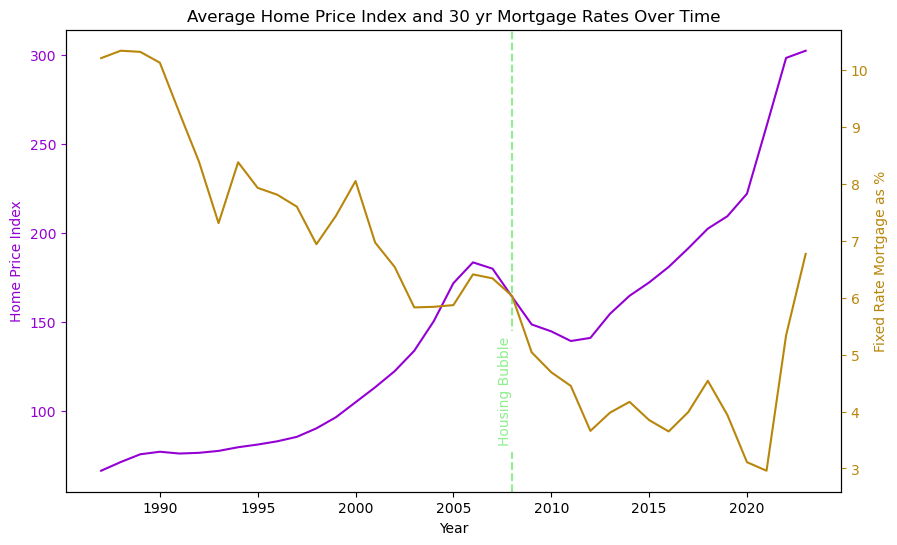

In [53]:
# Ploting 30 year fixed mortgage rates and the housing index 

home_price_index_and_30yr = home_price_index_and_30yr.dropna()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home price index on the primary y-axis
ax1.plot(home_price_index_and_30yr['Year'], home_price_index_and_30yr['Avg. Home Price Index'], label='Home Price Index', color='darkviolet')
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Price Index', color='darkviolet')
ax1.tick_params('y', colors='darkviolet')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_price_index_and_30yr['Year'], home_price_index_and_30yr['Avg. 30 Year Fixed Mortgage Rate'], label='30 yr Fixed Rate Mortgage', color='darkgoldenrod')
ax2.set_ylabel('Fixed Rate Mortgage as %', color='darkgoldenrod')
ax2.tick_params('y', colors='darkgoldenrod')

vertical_line_label = 'Housing Bubble'
vertical_line_year = 2008

ax1.axvline(x=vertical_line_year, color='lightgreen', linestyle='--', label=vertical_line_label)
ax1.text(vertical_line_year, ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.1, vertical_line_label, color='lightgreen', va='bottom', ha='right', backgroundcolor='white', rotation='vertical')

plt.title('Average Home Price Index and 30 yr Mortgage Rates Over Time')

plt.savefig('Average Home Price Index and 30 yr Mortgage Rates Over Time.png')

plt.show()

In [63]:
# Merging home_price_index_df with mortgage_15_df
home_price_index_and_15yr = work_file[[
    'Year','Avg. 15 Year Fixed Mortgage Rate','Avg. Home Price Index'
]]
home_price_index_and_15yr

,Year,Avg. 15 Year Fixed Mortgage Rate,Avg. Home Price Index
0,1963,NaN,NaN
1,1964,NaN,NaN
2,1965,NaN,NaN
3,1966,NaN,NaN
4,1967,NaN,NaN
5,1968,NaN,NaN
6,1969,NaN,NaN
7,1970,NaN,NaN
8,1971,NaN,NaN
9,1972,NaN,NaN


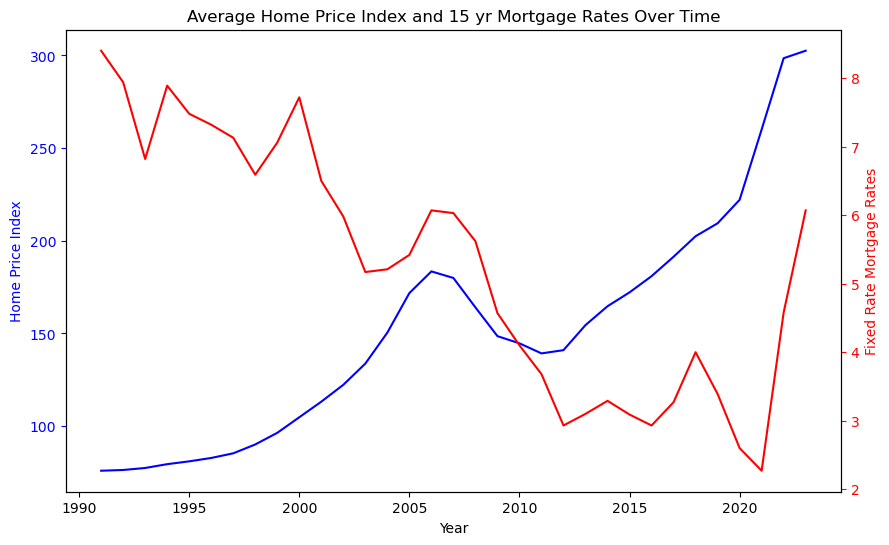

In [71]:
# Ploting 15 year fixed mortgage rates and the housing index 

home_price_index_and_15yr = home_price_index_and_15yr.dropna()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home price index on the primary y-axis
ax1.plot(home_price_index_and_15yr['Year'], home_price_index_and_15yr['Avg. Home Price Index'], label='Home Price Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Price Index', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_price_index_and_15yr['Year'], home_price_index_and_15yr['Avg. 15 Year Fixed Mortgage Rate'], label='15 yr Fixed Rate Mortgage Rates', color='red')
ax2.set_ylabel('Fixed Rate Mortgage Rates', color='red')
ax2.tick_params('y', colors='red')


plt.title('Average Home Price Index and 15 yr Mortgage Rates Over Time')

plt.savefig('Average Home Price Index and 15 yr Mortgage Rates Over Time.png')

plt.show()


In [65]:
# Merging Avg. Median Home Sale Price and 30 yr Mortgage
home_sale_price_and_30yr = work_file[[
    'Year','Avg. 30 Year Fixed Mortgage Rate','Avg. Median Home Sale Price'
]]

home_sale_price_and_30yr

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. Median Home Sale Price
0,1963,NaN,18050.00
1,1964,NaN,18925.00
2,1965,NaN,20125.00
3,1966,NaN,21500.00
4,1967,NaN,22750.00
5,1968,NaN,24800.00
6,1969,NaN,25600.00
7,1970,NaN,23475.00
8,1971,7.54,25225.00
9,1972,7.38,27525.00


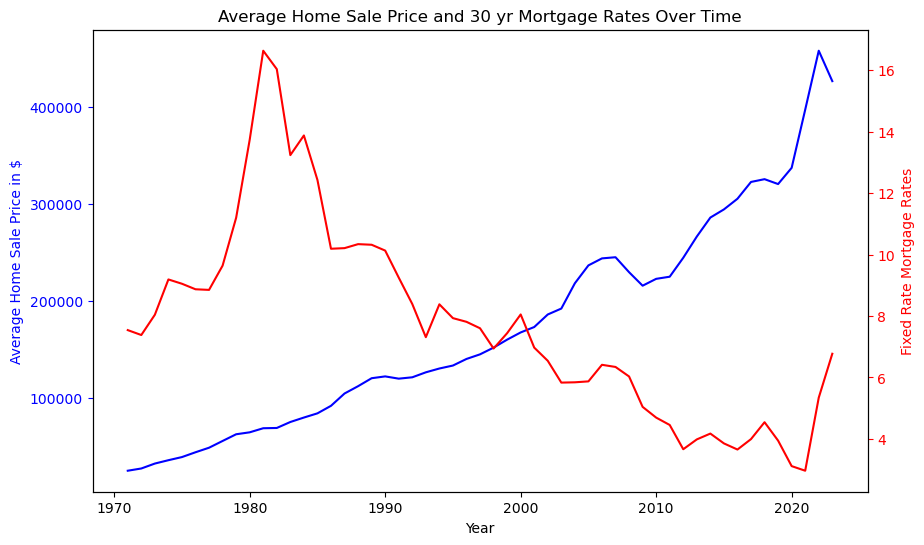

In [72]:
# Ploting 30 year fixed mortgage rates and the average home sale price

home_sale_price_and_30yr = home_sale_price_and_30yr.dropna()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home price index on the primary y-axis
ax1.plot(home_sale_price_and_30yr['Year'], home_sale_price_and_30yr['Avg. Median Home Sale Price'], label='Average Home Sale Price', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Home Sale Price in $', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_sale_price_and_30yr['Year'], home_sale_price_and_30yr['Avg. 30 Year Fixed Mortgage Rate'], label='30 yr Fixed Rate Mortgage Rates', color='red')
ax2.set_ylabel('Fixed Rate Mortgage Rates', color='red')
ax2.tick_params('y', colors='red')

plt.title('Average Home Sale Price and 30 yr Mortgage Rates Over Time')

plt.savefig('Average Home Sale Price and 30 yr Mortgage Rates Over Time.png')

plt.show()

In [68]:
# Merging Avg. Median Home Sale Price and 15 yr Mortgage
home_sale_price_and_15yr = work_file[[
    'Year','Avg. 15 Year Fixed Mortgage Rate','Avg. Median Home Sale Price'
]]

home_sale_price_and_15yr

,Year,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price
0,1963,NaN,18050.00
1,1964,NaN,18925.00
2,1965,NaN,20125.00
3,1966,NaN,21500.00
4,1967,NaN,22750.00
5,1968,NaN,24800.00
6,1969,NaN,25600.00
7,1970,NaN,23475.00
8,1971,NaN,25225.00
9,1972,NaN,27525.00


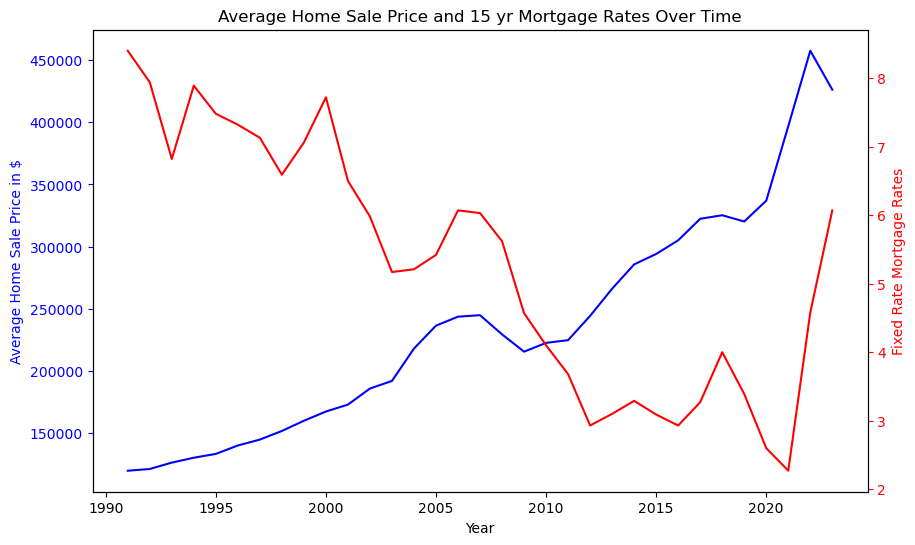

In [73]:
# Ploting 15 year fixed mortgage rates and the average home sale price

home_sale_price_and_15yr = home_sale_price_and_15yr.dropna()



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home price index on the primary y-axis
ax1.plot(home_sale_price_and_15yr['Year'], home_sale_price_and_15yr['Avg. Median Home Sale Price'], label='Average Home Sale Price "($ thousands)"', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Home Sale Price in $', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for fixed rate mortgage rates
ax2 = ax1.twinx()
ax2.plot(home_sale_price_and_15yr['Year'], home_sale_price_and_15yr['Avg. 15 Year Fixed Mortgage Rate'], label='15 yr Fixed Rate Mortgage Rates', color='red')
ax2.set_ylabel('Fixed Rate Mortgage Rates', color='red')
ax2.tick_params('y', colors='red')

plt.title('Average Home Sale Price and 15 yr Mortgage Rates Over Time')

plt.savefig('Average Home Sale Price and 15 yr Mortgage Rates Over Time.png')

plt.show()